In [1]:
pip install PyPrind

In [2]:
import pyprind
import pandas as pd
import os
import io
basepath = r'G:\\aclImdb_3'

labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test_1', 'train_1'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in os.listdir(path):
            # For python2, use 'io.open', for Python3, just us 'open' 
            with io.open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:33:09


In [3]:
#how to check column
df.columns

Index(['review', 'sentiment'], dtype='object')

In [4]:
X = df.loc[:,:].values
X.shape

(50000, 2)

In [5]:
import numpy as np
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('./movie_data.csv', index=False, encoding='utf-8')

df = pd.read_csv('./movie_data.csv')
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [6]:
#how to check nan values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

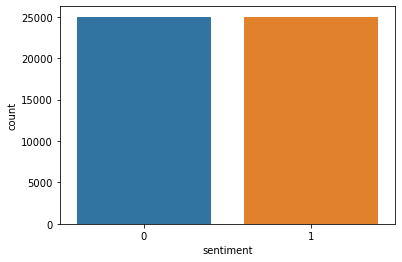

In [8]:
#how to plot the data set
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [8]:
print("shape of the data set: ", df.shape)

shape of the data set:  (50000, 2)


In [9]:
#Importing essential libraries for performing Natural Language Processing
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Cleaning the dataset
corpus = []
ps = PorterStemmer()
for i in range(0,df.shape[0]):
  #Cleaning Special Character from the  SentimentText
  SentimentText = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.review[i])
  #convert the entrie row  SentimentText to the lower case
  SentimentText = SentimentText.lower()
  #Tokenizing the SentimentTexte into reviews words
  words = SentimentText.split()
  #Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]
  #Stemming the words
  words = [ps.stem(word) for word in words]
  #Joining the Stemmend words
  SentimentText = ' '.join(words)
  #Buliding a corpus of  SentimentText
  corpus.append(SentimentText)

In [11]:
corpus[0:3]

['teenag martha moxley maggi grace move high class area bell greenwich connecticut mischief night eve halloween murder backyard hous murder remain unsolv twenti two year later writer mark fuhrman christoph meloni former la detect fallen disgrac perjuri j simpson trial move idaho decid investig case partner stephen week andrew mitchel purpos write book local squirm welcom support retir detect steve carrol robert forster charg investig discov crimin net power money cover murder br br murder greenwich good tv movi true stori murder fifteen year old girl commit wealthi teenag whose mother kennedi power rich famili use influenc cover murder twenti year howev snoopi detect convict perjur disgrac abl disclos hideou crime commit screenplay show investig mark last day martha parallel lack emot dramat vote seven br br titl brazil avail',
 'ok realli like kri kristofferson usual easi go deliveri line movi age help soft spoken low energi style steal scene effortlessli disappear misstep holi moli b

In [12]:
# #Creating the Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [13]:
X.shape

(50000, 68997)

In [14]:
y = df.iloc[:, 1].values

In [15]:
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [16]:
#Spliting the data set using train_test_split
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

# Sentiment classification using machine learning algorthim like LR, RFC, MNB and SVM

In [23]:
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_x,training_y)

E:\Git\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#predicting the result
y_pred = lr.predict(test_x)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5034
           1       0.87      0.88      0.88      4966

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ",accuracy_score(test_y,y_pred))

Accuracy Score is:  0.8789


In [31]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(test_y,y_pred)

In [32]:
lr_cm

array([[4395,  639],
       [ 572, 4394]], dtype=int64)

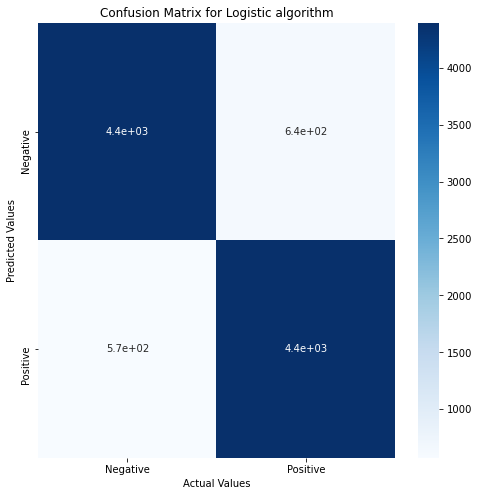

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Logistic algorithm")
plt.show()

In [34]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

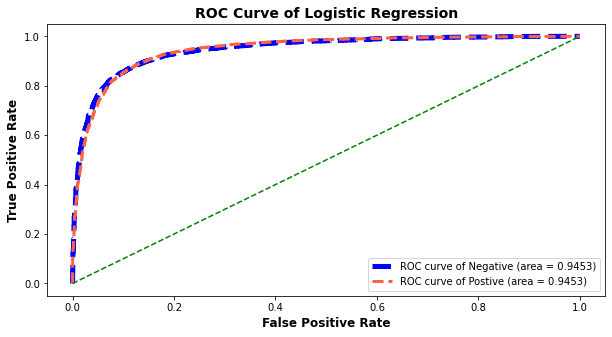

AUC Score is:  {'Negative': 0.9453297120458849, 'Postive': 0.945329712045885}


In [35]:
print('AUC Score is: ' , plot_roc(test_x , test_y, lr, 'Logistic Regression'))

Random Forest Classifier

In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(training_x,training_y)

RandomForestClassifier()

In [37]:
#predicting the result
y_pred = rfc.predict(test_x)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5034
           1       0.84      0.85      0.85      4966

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.8485


In [40]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(test_y,y_pred)
rfc_cm

array([[4241,  793],
       [ 722, 4244]], dtype=int64)

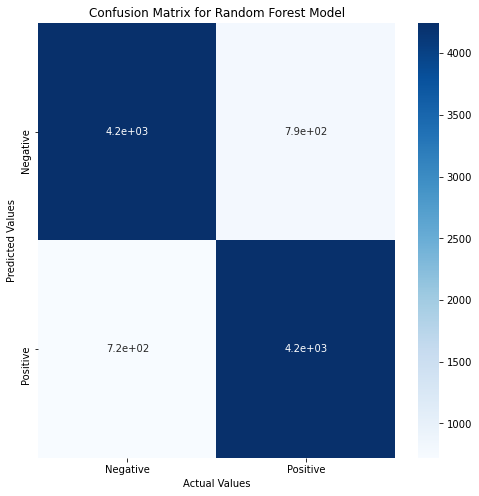

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(data=rfc_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [42]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

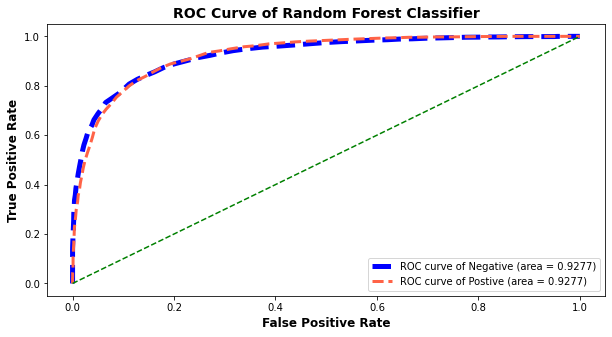

AUC Score is:  {'Negative': 0.9277455589546462, 'Postive': 0.9277455589546459}


In [43]:
print('AUC Score is: ' , plot_roc(test_x , test_y, rfc, 'Random Forest Classifier'))

Multinomial Naive Bayes Classifier

In [44]:
#Multinomial Classifier 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB()

In [45]:
#predicting the result
y_pred = mnb.predict(test_x)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5034
           1       0.87      0.84      0.85      4966

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.8578


In [49]:
from sklearn.metrics import confusion_matrix
mnb_cm = confusion_matrix(test_y,y_pred)
mnb_cm

array([[4386,  648],
       [ 774, 4192]], dtype=int64)

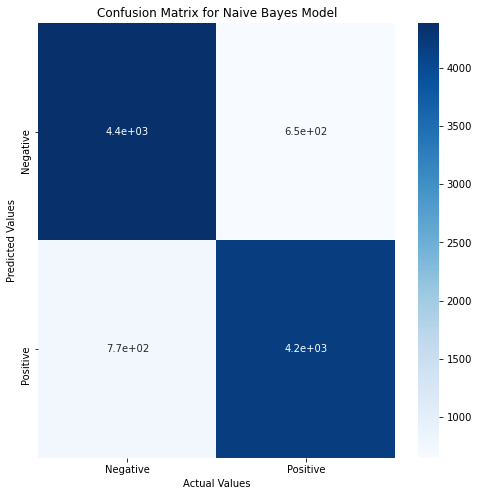

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(data=mnb_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

In [51]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

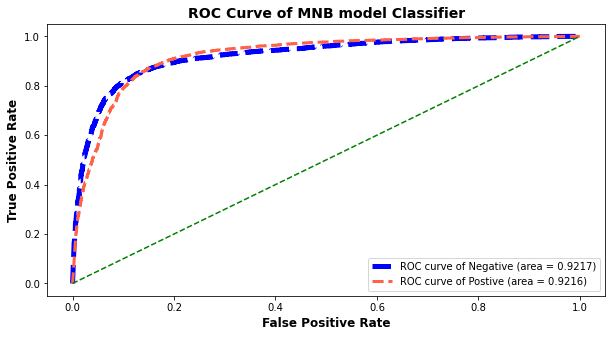

AUC Score is:  {'Negative': 0.9217004994310936, 'Postive': 0.9215973546616796}


In [52]:
print('AUC Score is: ' , plot_roc(test_x , test_y, mnb, 'MNB model Classifier'))

Support vector classifier (SVC)

In [53]:
from sklearn.svm import SVC # "Support vector classifier"  
svm = SVC()  
svm.fit(training_x,training_y)

SVC()

In [54]:
#predicting the result
y_pred = svm.predict(test_x)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      5034
           1       0.85      0.90      0.88      4966

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.873


In [57]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(test_y,y_pred)
svm_cm

array([[4262,  772],
       [ 498, 4468]], dtype=int64)

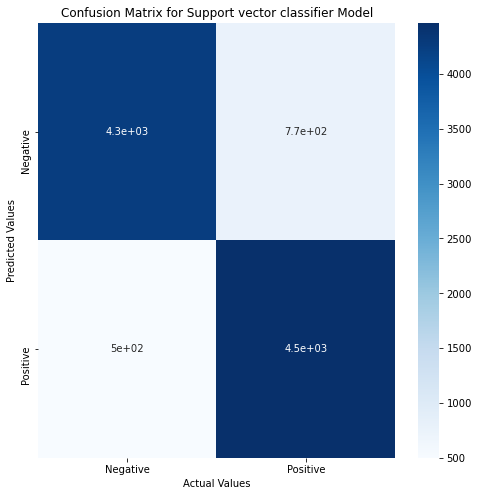

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(data=svm_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Support vector classifier Model")
plt.show()

# model Prediction with SVM and Logistic Regression

Prediction with SVM

In [61]:
def predict_sentiment(review):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()
    return svm.predict(temp)

In [62]:
#Predicting values
review = '"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J.'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Positive Review


In [63]:
#Predicting values
review = 'Set in and near a poor working class town in the mountains of rural Italy, a story of madness.'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Negative Review


Prediction with LR

In [64]:
def predict_sentiment(review):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()
    return lr.predict(temp)

In [67]:
#Predicting values
review = 'Do not read this, if you think about watching that movie, although it would be a waste of time'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Negative Review


In [69]:
#Predicting values
review = 'is such a great musical because it deftly blends the contrasting styles of film and stage. During a dazzling opening sequence'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Positive Review


# Sentiment classification using Neural Network model.

In [17]:
print("Size of training_x: ", (training_x.shape))
print("Size of training_y: ", (training_y.shape))
print("Size of test_y: ", (test_x.shape))
print("Size of test_y: ", (test_y.shape))  

Size of training_x:  (40000, 68997)
Size of training_y:  (40000,)
Size of test_y:  (10000, 68997)
Size of test_y:  (10000,)


In [36]:
x_train = training_x[:15000]
y_train = training_y[:15000]
x_test = test_x[:5000]
y_test = test_y[:5000]

In [37]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (15000, 68997)
Size of y_train:  (15000,)
Size of x_test:  (5000, 68997)
Size of y_test:  (5000,)


In [38]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [39]:
x_train.shape

(15000, 68997)

In [40]:
#pip install tensorflow

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1103968   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,104,113
Trainable params: 1,104,113
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 243s 140ms/step - loss: 0.3443 - accuracy: 0.8675
Epoch 2/10
1500/1500 [==============================] - 215s 143ms/step - loss: 0.2243 - accuracy: 0.9174
Epoch 3/10
1500/1500 [==============================] - 208s 139ms/step - loss: 0.1916 - accuracy: 0.9331
Epoch 4/10
1500/1500 [==============================] - 206s 137ms/step - loss: 0.1679 - accuracy: 0.9385
Epoch 5/10
1500/1500 [==============================] - 209s 139ms/step - loss: 0.1535 - accuracy: 0.9484
Epoch 6/10
1500/1500 [==============================] - 204s 136ms/step - loss: 0.1405 - accuracy: 0.9527
Epoch 7/10
1500/1500 [==============================] - 203s 136ms/step - loss: 0.1295 - accuracy: 0.9575
Epoch 8/10
1500/1500 [==============================] - 208s 139ms/step - loss: 0.1189 - accuracy: 0.9611
Epoch 9/10
1500/1500 [==============================] - 210s 140ms/step - loss: 0.1099 - accuracy: 0.9649
Epoch 10/10
1500/1500 [=======================

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

157/157 [==============================] - 48s 230ms/step - loss: 0.4332 - accuracy: 0.8748
Test loss: 0.43322667479515076
Test accuracy: 0.8748000264167786


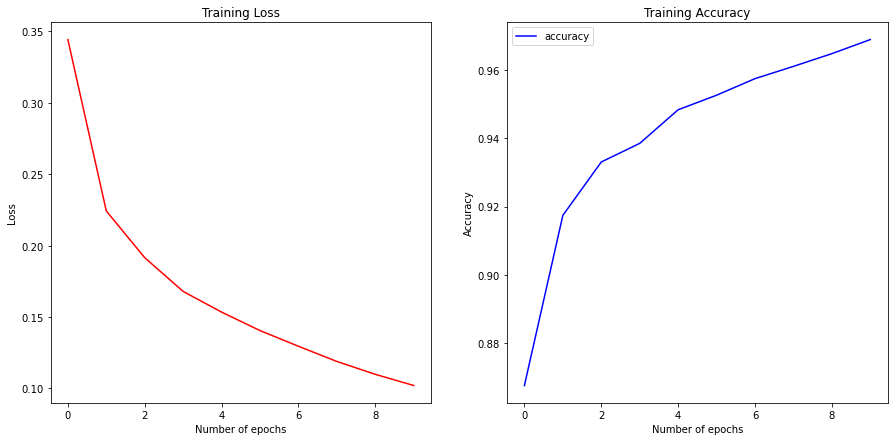

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
from keras.models import load_model
model.save("NN.h5")